# **MONKEYPOX DETECTION USING DEEP LEARNING MODELS AND EXPLAINABLE AI WITH FEDERATED LEARNING**



---



RATIONELE FOR PROJECT

Mpox, formerly known as monkeypox, is a rare but potentially serious viral disease caused by the monkeypox virus, a species of the genus Orthopoxvirus (World Health Organization, 2024). The disease has two distinct clades: clade I (with subclades Ia and Ib) and clade II (with subclades IIa and IIb), with clade II being the most recent mpox that has caused a global outbreak in 2024 (CDC, 2024). The focus of this project is to examine how Machine Learning models can be utilized to accurately diagnose specific disease through classification and detection techniques while considering racial bias. The ongoing global outbreak of clade II has caused more than 100 00 cases in 122 countries, including 115 countries where Mpox was not reported previously (CDC, 2024).

The fatality rate of Mpox can reach up to 11% depending on the strain and the health condition of the affected individual, with the Clade I having a mortality rate of around 3.6% (Mpox Virus: Clade I and Clade II, n.d). There is no specific treatment for Mpox, antiviral medications like tecovirimat (TPOXX) can help mitigate symptoms, but these treatments are not accessible in underprivileged areas (CDC, 2024). With the ongoing violence in the Democratic Republic of Congo, efforts to control Mpox have been severely hindered by ongoing violence, which results in higher transmission rates and delayed responses.

The traditional diagnosis method is PCR testing, and Serological testing, where PCR is the primary method that uses samples from skin lesions and is the most preferred because of its high sensitivity and specificity, while Serological tests detect antibodies, but this test is less reliable due to its cross-reactivity with other orthopoxviruses (Khehra, Padda and Swift, 2023). Both these methods have their limitations, and these include the need for specialized equipment and trained personnel and the potential for false negatives due to viral mutations. Enhancing diagnostic accuracy and accessibility, especially in resource-limited environments, requires the development of a reliable computer-based framework for the detection of Mpox disease. The goal is to provide an accessible, reliable tool that aids healthcare professionals in conflict zones and underprivileged areas

AIMS AND OBJECTIVES

AIM

To implement a robust, privacy-preserving, racially fair, and explainable Deep Learning framework integrated with Federated Learning for early and accurate Mpox detection.

OBJECTIVES

1.    Implement a Deep Learning model using Transfer Learning and Federated Learning on diverse skin lesion datasets to accurately classify Mpox.

2.    Assess and mitigate the impact of skin tone variations on model performance to ensure racial fairness in diagnosis.

3.    Integrate and evaluate Explainable AI techniques such as Grad-CAM and LIME to improve transparency and trustworthiness of the model’s predictions.

4.    Benchmark the proposed framework against traditional diagnostic methods and recent Deep Learning approaches using robust cross-validation techniques.





---



## 1. IMPORT IMPORTANT LIBRARIES

In [1]:
pip install imgaug opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 20.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install tensorflow

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import os
import shutil
import zipfile
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
#import imgaug.augmenters as iaa
from skimage import io
#from imgaug.augmentables.segmaps import SegmentationMapsOnImage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

2025-11-15 20:12:59.079233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763237579.280782      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763237579.338978      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.applications import ResNet152V2
from keras.applications import ResNet152V2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.models import load_model
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import cv2
from tensorflow.keras.applications import Xception
import os
import numpy as np
import pandas as pd
import gradio as gr
import joblib
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import joblib
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import InceptionV3

In [6]:
df=pd.read_csv('/kaggle/input/hsv-color/HSV Color Space Augmentation Dataset/balanced_dataset.csv')
df

,Lesion_Id,Image_Id,Diagnosis,Image_Path,Fold,Split
0,MKP_76_01,MKP_76_01_ORIGINAL_hsvaug_104,Monkeypox,C:\Datasets\color_images\MKP_76_01_ORIGINAL_hs...,fold1_AUG,Train
1,MKP_114_01,MKP_114_01_ORIGINAL_hsvaug_021,Monkeypox,C:\Datasets\color_images\MKP_114_01_ORIGINAL_h...,fold1_AUG,Train
2,MKP_74_03,MKP_74_03_ORIGINAL_hsvaug_163,Monkeypox,C:\Datasets\color_images\MKP_74_03_ORIGINAL_hs...,fold2_AUG,Train
3,MKP_58_05,MKP_58_05_ORIGINAL_hsvaug_095,Monkeypox,C:\Datasets\color_images\MKP_58_05_ORIGINAL_hs...,fold5_AUG,Train
4,MKP_72_07,MKP_72_07_ORIGINAL_hsvaug_140,Monkeypox,C:\Datasets\color_images\MKP_72_07_ORIGINAL_hs...,fold1_AUG,Train
...,...,...,...,...,...,...
201955,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_176,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train
201956,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_177,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train
201957,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_178,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train
201958,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_179,Measles,C:\Datasets\color_images\MSL_23_01_ORIGINAL_hs...,fold4_AUG,Train


In [7]:
import pandas as pd
import os

# === Define new base path ===
new_base_path = "/kaggle/input/hsv-color/HSV Color Space Augmentation Dataset/balanced_images"

# === Update the Image_Path column ===
df["Image_Path"] = df["Image_Id"].apply(lambda x: os.path.join(new_base_path, f"{x}.jpg"))

# === Save updated CSV ===
df.to_csv("updated_file.csv", index=False)

print("✅ Image paths updated and saved to updated_file.csv")

✅ Image paths updated and saved to updated_file.csv


In [8]:
#df1=pd.read_csv('updated_file.csv')

In [9]:
# Use correct column name
label_encoder = LabelEncoder()
df['Updated_Diagnosis_Label'] = label_encoder.fit_transform(df['Diagnosis'])
# Get mapping from label to encoded value
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# Display result
print("✅ Label Encoding Mapping:")
print(label_mapping)

✅ Label Encoding Mapping:
{'Chickenpox': 0, 'Cowpox': 1, 'HFMD': 2, 'Healthy': 3, 'Measles': 4, 'Monkeypox': 5}


In [10]:
# Calculate class weights
class_counts = df['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 6.0, 1: 6.0, 2: 6.0, 3: 6.0, 4: 6.0, 5: 6.0}


In [11]:
df

,Lesion_Id,Image_Id,Diagnosis,Image_Path,Fold,Split,Updated_Diagnosis_Label
0,MKP_76_01,MKP_76_01_ORIGINAL_hsvaug_104,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold1_AUG,Train,5
1,MKP_114_01,MKP_114_01_ORIGINAL_hsvaug_021,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold1_AUG,Train,5
2,MKP_74_03,MKP_74_03_ORIGINAL_hsvaug_163,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold2_AUG,Train,5
3,MKP_58_05,MKP_58_05_ORIGINAL_hsvaug_095,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold5_AUG,Train,5
4,MKP_72_07,MKP_72_07_ORIGINAL_hsvaug_140,Monkeypox,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold1_AUG,Train,5
...,...,...,...,...,...,...,...
201955,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_176,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4
201956,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_177,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4
201957,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_178,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4
201958,MSL_23_01,MSL_23_01_ORIGINAL_hsvaug_179,Measles,/kaggle/input/hsv-color/HSV Color Space Augmen...,fold4_AUG,Train,4


# 5. SPLIT

In [12]:
X = df.drop(columns=['Updated_Diagnosis_Label'])
y = df['Updated_Diagnosis_Label']

print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (201960, 6)
Shape of target variable (y): (201960,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_Path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_Path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_Path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 161568 validated image filenames belonging to 6 classes.
Found 20196 validated image filenames belonging to 6 classes.
Found 20196 validated image filenames belonging to 6 classes.


# 6. MODEL IMPLEMENTATION

In [15]:
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tune last 100 layers
for layer in base_model.layers[:-100]:
    layer.trainable = False
for layer in base_model.layers[-100:]:
    layer.trainable = True

# Build custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)

x = Dense(512, activation="relu", kernel_regularizer=l2(1e-4))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(128, activation="relu", kernel_regularizer=l2(1e-4))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

predictions = Dense(6, activation="softmax")(x)

I0000 00:00:1763237788.703012      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763237788.703674      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
model = Model(inputs=base_model.input, outputs=predictions)

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adamax(),
            metrics=['accuracy'])

In [18]:
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [19]:
class_counts = df['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 6.0, 1: 6.0, 2: 6.0, 3: 6.0, 4: 6.0, 5: 6.0}


In [20]:
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=2500,  # instead of going through ALL images each epoch
    validation_data=val_generator,
    callbacks=[lr_reduction, early_stopping]
)

Epoch 1/10


I0000 00:00:1763237838.774461      77 service.cc:148] XLA service 0x7a3a5c005580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763237838.775329      77 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763237838.775351      77 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763237843.409182      77 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763237860.120770      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1426s 545ms/step - accuracy: 0.8470 - loss: 0.5629 - val_accuracy: 0.9983 - val_loss: 0.1036 - learning_rate: 0.0010
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1269s 508ms/step - accuracy: 0.9845 - loss: 0.1488 - val_accuracy: 1.0000 - val_loss: 0.0858 - learning_rate: 0.0010
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 146s 58ms/step - accuracy: 0.9853 - loss: 0.1269 - val_accuracy: 0.9998 - val_loss: 0.0858 - learning_rate: 0.0010
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1277s 511ms/step - accuracy: 0.9906 - loss: 0.1125 - val_accuracy: 0.9996 - val_loss: 0.0728 - learning_rate: 0.0010
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1291s 516ms/step - accuracy: 0.9943 - loss: 0.0896 - val_accuracy: 0.9999 - val_loss: 0.0600 - learning_rate: 0.0010
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 146s 58ms/step - accuracy: 0.9974 - loss: 0.0680 - val_accuracy: 0.9999 - val_loss: 0.0596 - learning_rate: 0.0010
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1267s 507ms/step - 

# 7. MODEL EVALUATION

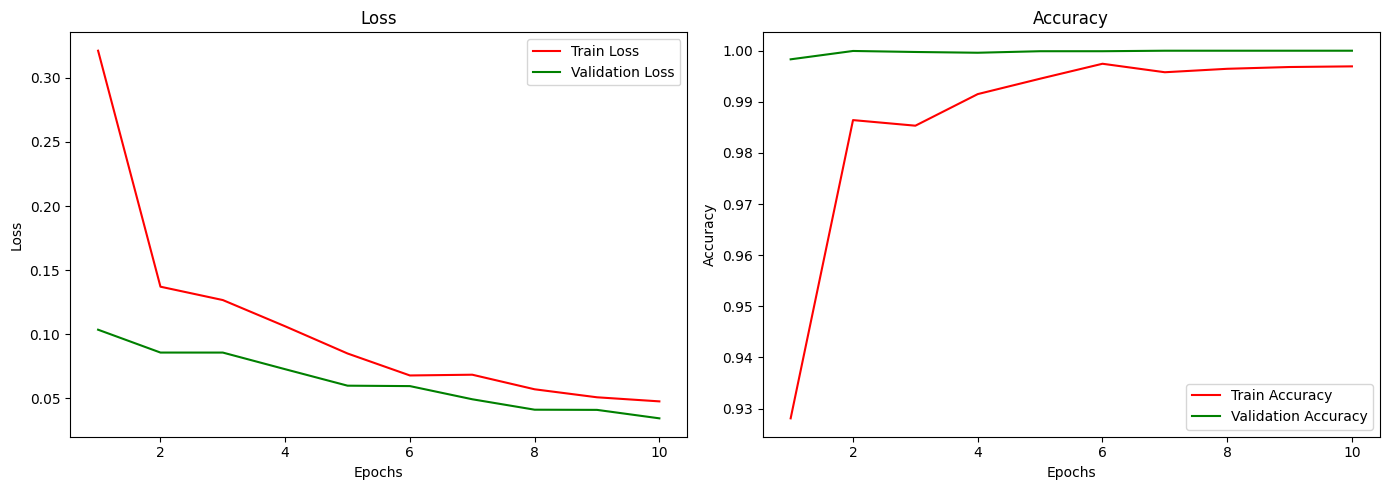

In [21]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

632/632 ━━━━━━━━━━━━━━━━━━━━ 125s 197ms/step - accuracy: 1.0000 - loss: 0.0345
Test Accuracy: 1.00


In [23]:
loss, accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {accuracy:.2f}")

5049/5049 ━━━━━━━━━━━━━━━━━━━━ 2211s 438ms/step - accuracy: 0.9997 - loss: 0.0356
Train Accuracy: 1.00


In [24]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')
mse = mean_squared_error(true_classes, predicted_classes)
bias = (np.mean(predicted_classes) - np.mean(true_classes)) ** 2
variance = np.var(predicted_classes)


print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

632/632 ━━━━━━━━━━━━━━━━━━━━ 145s 215ms/step
Accuracy: 1.00
Sensitivity: 1.00
Specificity: 1.00
Precision: 1.00
F1-Score: 1.00
AUC: 1.00
Mean Squared Error: 0.00


632/632 ━━━━━━━━━━━━━━━━━━━━ 126s 198ms/step


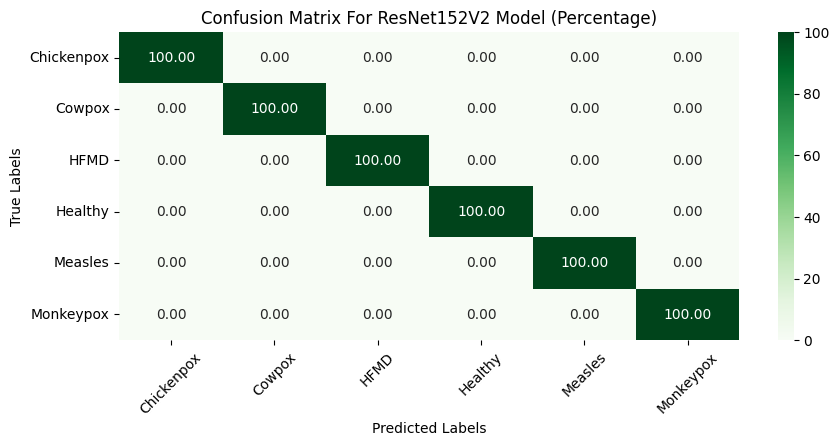

In [25]:
# Assuming you have predictions and true_classes already
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
# Normalize the confusion matrix to show percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix_percentage, annot=True, cmap='Greens', fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For ResNet152V2 Model (Percentage)')
plt.xticks(rotation=45)
plt.show()

632/632 ━━━━━━━━━━━━━━━━━━━━ 125s 198ms/step


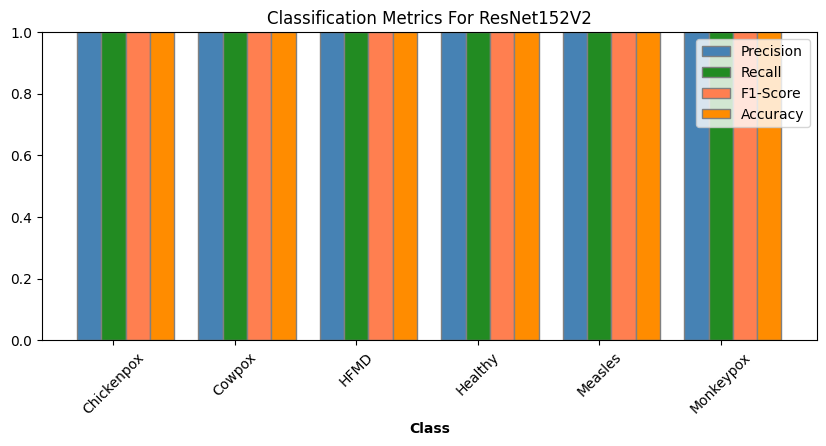

In [26]:
predictions = model.predict(test_generator)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes)

accuracy = [accuracy_score(true_classes, predicted_classes) for _ in range(len(class_labels))]

plt.figure(figsize=(10, 4))

bar_width = 0.2
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision, color='steelblue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='forestgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='coral', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='darkorange', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels, rotation=45)
plt.title('Classification Metrics For ResNet152V2')
plt.legend()
plt.ylim(0, 1)
plt.show()

# 8. TESTING MODEL

    Lesion_Id                        Image_Id  Diagnosis  \
0   MKP_76_01   MKP_76_01_ORIGINAL_hsvaug_104  Monkeypox   
1  MKP_114_01  MKP_114_01_ORIGINAL_hsvaug_021  Monkeypox   
2   MKP_74_03   MKP_74_03_ORIGINAL_hsvaug_163  Monkeypox   
3   MKP_58_05   MKP_58_05_ORIGINAL_hsvaug_095  Monkeypox   
4   MKP_72_07   MKP_72_07_ORIGINAL_hsvaug_140  Monkeypox   

                                          Image_Path       Fold  Split  \
0  /kaggle/input/hsv-color/HSV Color Space Augmen...  fold1_AUG  Train   
1  /kaggle/input/hsv-color/HSV Color Space Augmen...  fold1_AUG  Train   
2  /kaggle/input/hsv-color/HSV Color Space Augmen...  fold2_AUG  Train   
3  /kaggle/input/hsv-color/HSV Color Space Augmen...  fold5_AUG  Train   
4  /kaggle/input/hsv-color/HSV Color Space Augmen...  fold1_AUG  Train   

   Updated_Diagnosis_Label  
0                        5  
1                        5  
2                        5  
3                        5  
4                        5  
632/632 ━━━━━━━━━━━━

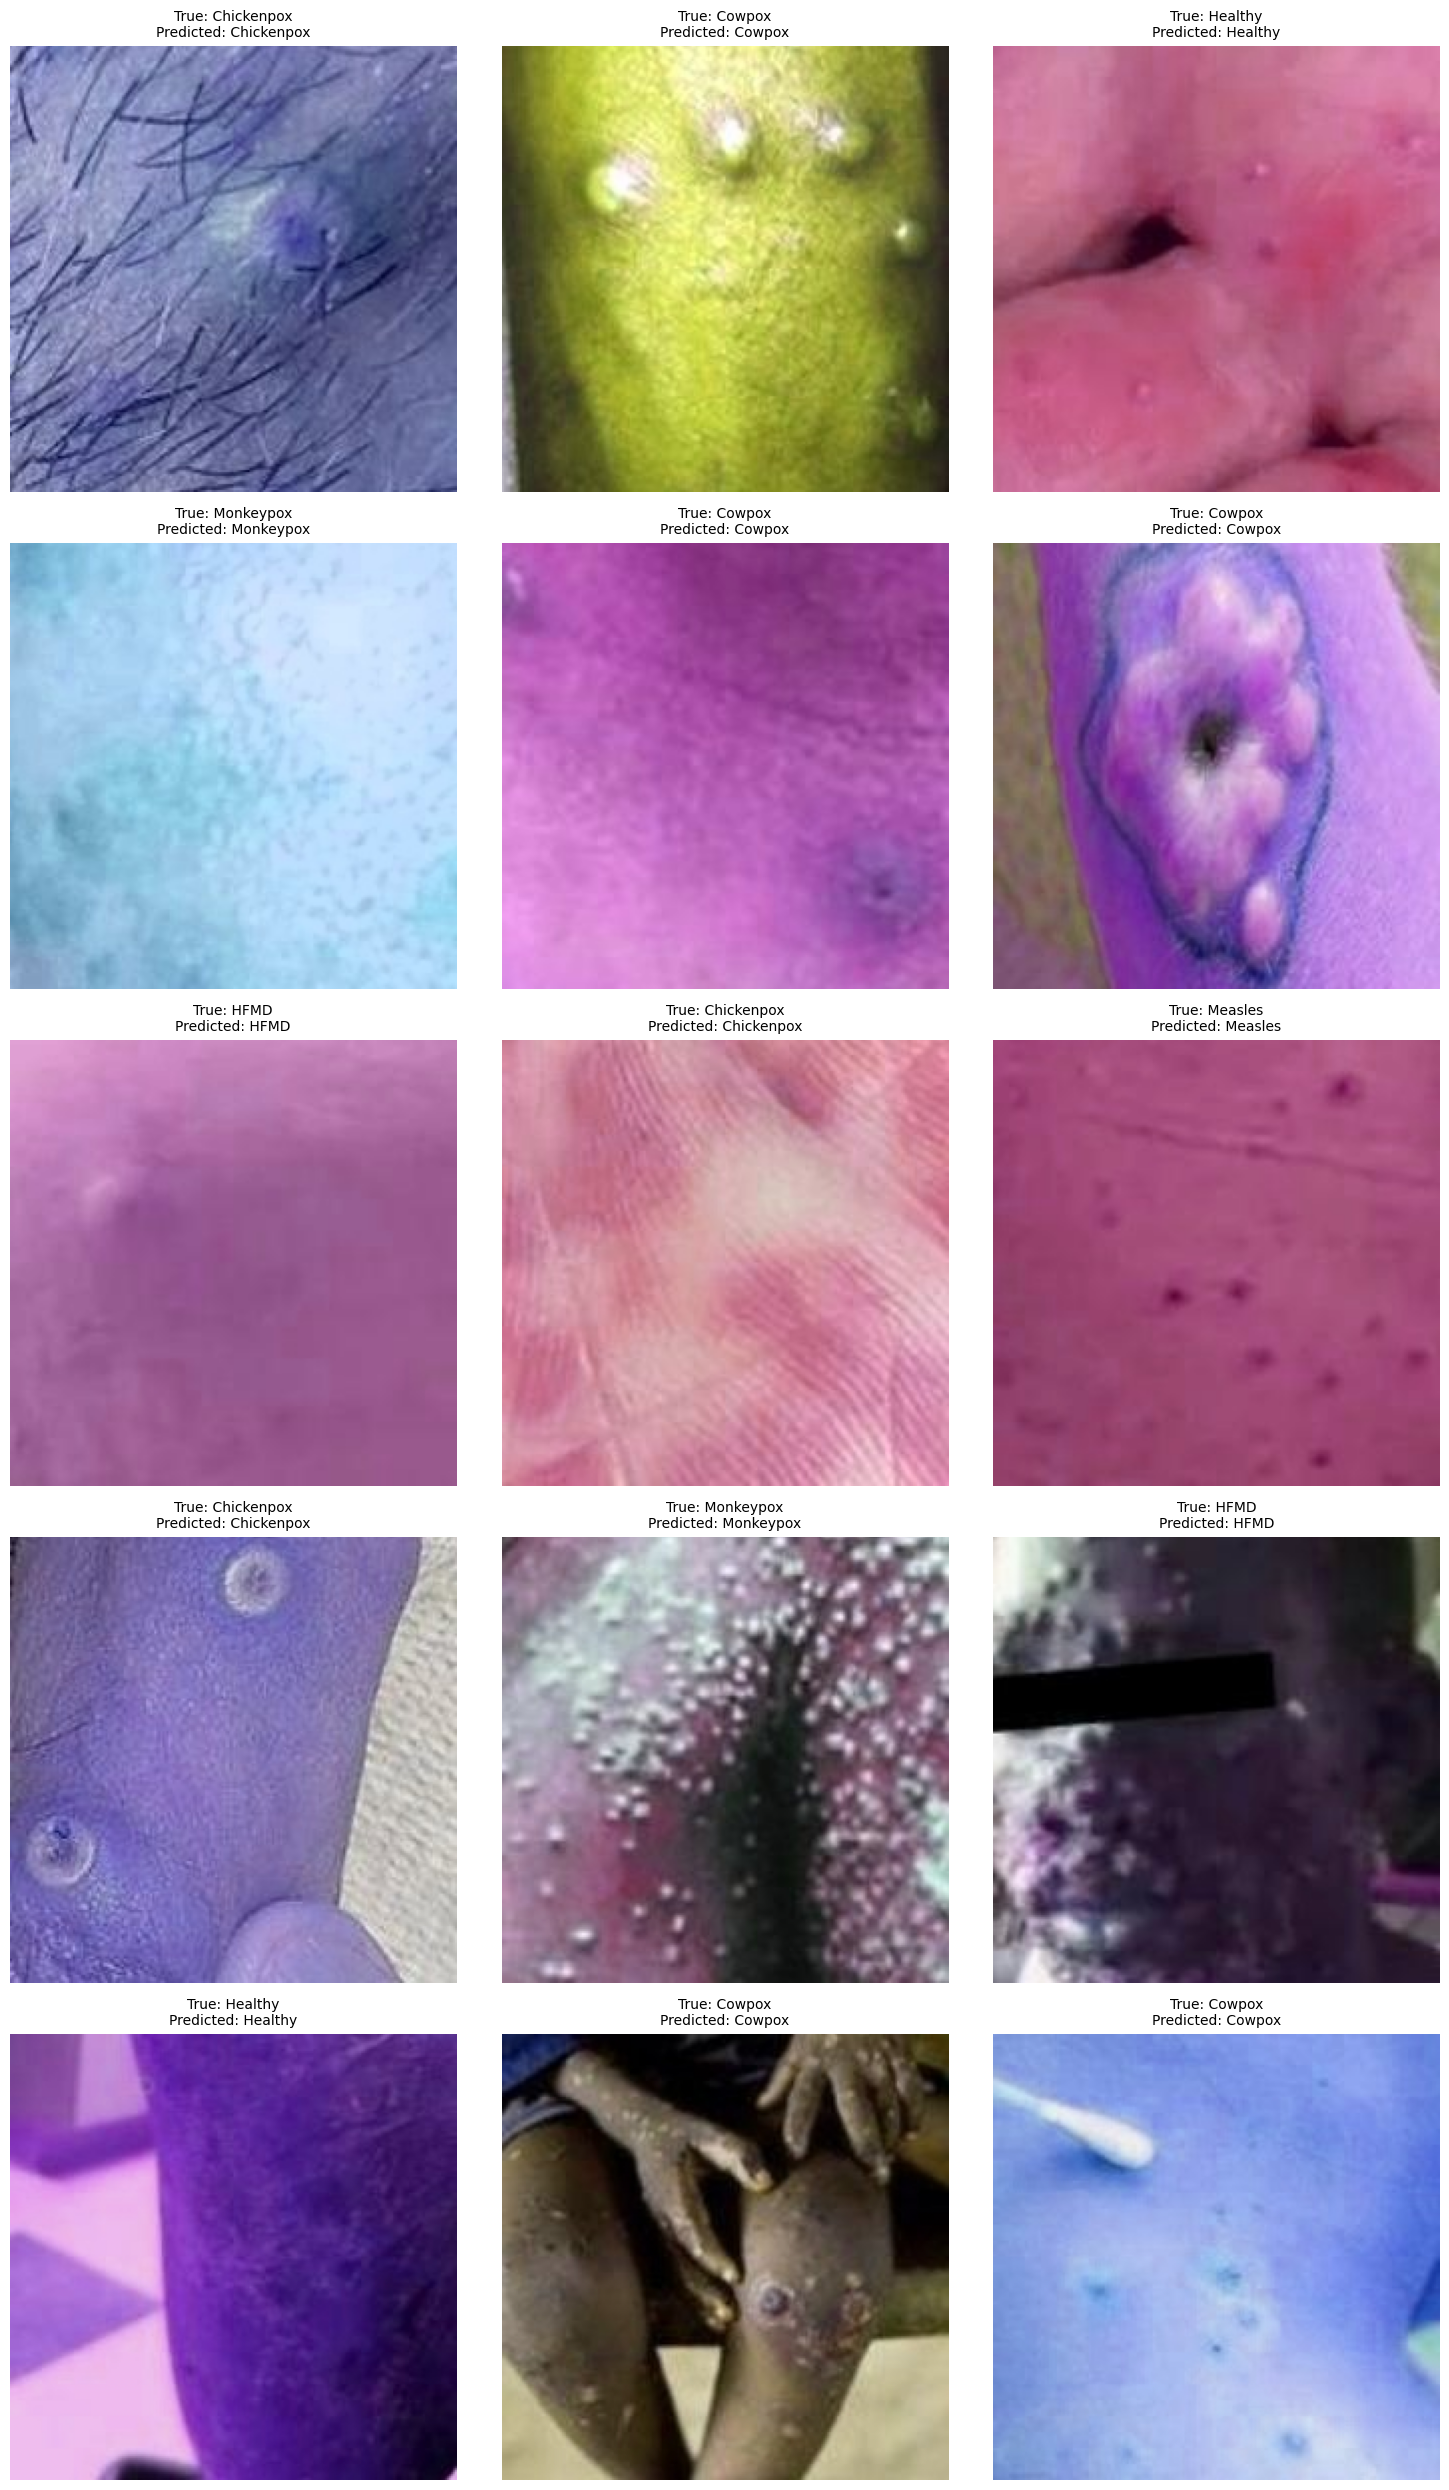

In [27]:
print(df.head())
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

class_labels = list(test_generator.class_indices.keys())

print(f"Length of true_labels: {len(true_labels)}")
print(f"Length of predicted_labels: {len(predicted_labels)}")
print(f"Length of meta_data: {len(df)}")

if len(true_labels) > len(df):
    raise ValueError("The number of true labels exceeds the number of rows in the meta_data DataFrame.")

meta_data = df.iloc[:len(true_labels)]

meta_data['true_label'] = [class_labels[true_labels[i]] for i in range(len(true_labels))]
meta_data['predicted_label'] = [class_labels[predicted_labels[i]] for i in range(len(predicted_labels))]

plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    img = plt.imread(meta_data['Image_Path'].iloc[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {meta_data['true_label'].iloc[i]}\nPredicted: {meta_data['predicted_label'].iloc[i]}", fontsize=10)

plt.tight_layout()
plt.show()

# Testing With External Data

In [28]:
model.save('Bonolo_Mpox_ResNet152V2_model.h5')

In [29]:
import joblib

# Save
joblib.dump(model, "/kaggle/working/Bonolo_Mpox_ResNet152V2_model.pkl")

['/kaggle/working/Bonolo_Mpox_ResNet152V2_model.pkl']

## WebApp

In [30]:
# Correct load
MODEL_PATH = "Bonolo_Mpox_ResNet152V2_model.h5"   # string path
model = load_model(MODEL_PATH)

In [31]:
# -----------------------------
# Load your saved model
# -----------------------------
CLASS_NAMES = ["Mpox", "Chickenpox", "Measles", "Cowpox", "Healthy", "Hand Foot and Mouth"]

# If using TensorFlow/Keras model:
model = load_model(MODEL_PATH)

# -----------------------------
# Preprocessing function
# -----------------------------
def preprocess(img: np.ndarray, target_size=(224, 224)):
    """Resize and scale image before prediction."""
    img = image.array_to_img(img).resize(target_size)  # convert to PIL, resize
    img_array = image.img_to_array(img)               # convert to array
    img_array = np.expand_dims(img_array, axis=0)     # add batch dimension
    img_array = img_array / 255.0                     # normalize
    return img_array

# -----------------------------
# Prediction function
# -----------------------------
def predict(img):
    img_array = preprocess(img)
    preds = model.predict(img_array)[0]

    idx = int(np.argmax(preds))
    pred_class = CLASS_NAMES[idx]

    # Build probability table
    prob_df = pd.DataFrame({
        "class": CLASS_NAMES,
        "probability": preds
    }).sort_values("probability", ascending=False).reset_index(drop=True)

    return pred_class, prob_df

# -----------------------------
# Gradio UI
# -----------------------------
with gr.Blocks(title="Mpox Classifier") as demo:
    gr.Markdown("# 🦠 Skin Lesion Classifier\nUpload an image to predict the disease class.")

    with gr.Row():
        with gr.Column():
            img_input = gr.Image(type="numpy", label="Upload Image")
            predict_btn = gr.Button("Predict")

        with gr.Column():
            pred_label = gr.Label(label="Predicted Class")
            prob_table = gr.Dataframe(headers=["class", "probability"], row_count=(len(CLASS_NAMES), "fixed"))

    predict_btn.click(
        fn=predict,
        inputs=img_input,
        outputs=[pred_label, prob_table],
    )

if __name__ == "__main__":
    demo.launch()

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://0c45137118a73f20eb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Grad-CAM

In [32]:
# Grad-CAM for ResNet152V2
# -----------------------------
def grad_cam(img: np.ndarray, model, class_idx=None, layer_name=None):
    # Default last conv layer for ResNet152V2
    if layer_name is None:
        layer_name = "conv5_block3_out"

    # Preprocess image
    img_array = preprocess(img)

    # If no target class given, take predicted class
    if class_idx is None:
        preds = model.predict(img_array)
        class_idx = np.argmax(preds[0])

    # Gradient model
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0].numpy()
    pooled_grads = pooled_grads.numpy()

    # Weight the channels
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Build heatmap
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) != 0 else 1

    # Resize heatmap to image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    # Apply heatmap on original image
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(
        cv2.cvtColor(img, cv2.COLOR_RGB2BGR), 0.6,
        heatmap_color, 0.4, 0
    )

    return cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)


In [33]:
def predict_with_gradcam(img):
    pred_class, prob_df = predict(img)
    heatmap_img = grad_cam(img, model)  # generate Grad-CAM
    return pred_class, prob_df, heatmap_img

with gr.Blocks(title="Mpox Classifier with Grad-CAM") as demo:
    gr.Markdown("# 🦠 Skin Lesion Classifier\nUpload an image to predict and visualize heatmap.")

    # Row for Image + GradCAM
    with gr.Row():
        img_input = gr.Image(type="numpy", label="Upload Image")
        gradcam_output = gr.Image(type="numpy", label="Grad-CAM Heatmap")

    # Row for Prediction + Probability
    with gr.Row():
        pred_label = gr.Label(label="Predicted Class")
        prob_table = gr.Dataframe(headers=["class", "probability"], row_count=(len(CLASS_NAMES), "fixed"))

    predict_btn = gr.Button("Predict")

    predict_btn.click(
        fn=predict_with_gradcam,
        inputs=img_input,
        outputs=[pred_label, prob_table, gradcam_output],
    )

if __name__ == "__main__":
    demo.launch()

* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://ce51fedbb30c52376c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
